<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/regression-modeling-HousePrices/blob/main/Mod_3_House_Prices_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1E01avkCRSyan6wbelTYzigPE5Fy33OQh

Earlier versions of this code include additional EDA, reasoning for cleanup and handling missing data.
*   v0 - https://colab.research.google.com/drive/1gKRrXN0jYrheIwl3eefoSEj9gh3FwewI
*   v1 - https://colab.research.google.com/drive/1Cg5IznYQKiKiPJjcd3S_TltXvsYuW5Cw#scrollTo=WeDqFsFMadku
*   v2 - https://colab.research.google.com/drive/1mryWq2_iZNdTU_TyRtH-5n162GsY_jpn#scrollTo=9HWrWlpE3gFQ

Data taken from - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

### Import modules and data files

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#df_train_original.describe()
df_test_original.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Merge and clean data

#### Merge data

In [ ]:
# Create working datasets
df_train = df_train_original
df_test =  df_test_original

# Add a variable to both df_train and df_test indicating whether train or test dataset
df_train['TestYes'] = 0
df_test['TestYes'] = 1

# Create merged dataset used to cleanup data
df_merged = pd.concat([df_train, df_test])

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

#### Clean data

Handling systematic missing data as per v0 and v1 versions of the code.

In [ ]:
# Removing features where data is hard to predict
df_merged = df_merged.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Utilities', 'LotFrontage'], axis=1)
# Small number have observations for Alley, PoolQC, Fence and MiscFeatures, doesn't make sense to predict these for all the rest
# LotFrontage is a numeric variable that has lots of missing values
# Removed Utilities because all but one observation had Utilities = AllPub, wouldn't make a significant difference on prediciton

# Modifying FireplaceQu missing values to indicate "NF" to indicate "No Fireplace"
df_merged['FireplaceQu'] = df_merged['FireplaceQu'].fillna('NF')

# Modifying MasVnrArea and MasVnrType missing values to indicate "0" and "None" respectively.
# Assumption: if these values are missing there is no masonry veneer.
df_merged['MasVnrType'] = df_merged['MasVnrType'].fillna('None')
df_merged['MasVnrArea'] = df_merged['MasVnrArea'].fillna(0)

# When GarageArea is 0 categorical variables GarageType, GarageFinish, GarageQual and GarageCond should be set to "NG" to indicate "No Garage"
columns_to_update = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_merged.loc[df_merged['GarageArea'] == 0, columns_to_update] = 'NG'

# When GarageArea is 0 set GarageYrBlt to 0
df_merged.loc[df_merged['GarageArea'] == 0, 'GarageYrBlt'] = 0

# Set BsmTExpsoure to "No" for missing values if all square footage in the basement is unfinished
df_merged.loc[(df_merged['BsmtFinSF1'] == 0) & (df_merged['BsmtFinSF2'] == 0) & (df_merged['BsmtUnfSF'] > 0) & (df_merged['BsmtExposure'].isna()), 'BsmtExposure'] = 'No'

# Assume if TotalBsmtSF is missing, there is no basement
df_merged['TotalBsmtSF'] = df_merged['TotalBsmtSF'].fillna(0)

# When TotalBsmtSF is 0 categorical variables BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 should be set to "NB" to indicate "No Basement"
columns_to_update = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 'NB'

# When TotalBsmtSF is 0 numerical variables BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, BsmtFullBath and BsmtHalfBath should be set to 0.
columns_to_update = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
df_merged.loc[df_merged['TotalBsmtSF'] == 0, columns_to_update] = 0

# Set missing values of BsmtFinType2 to "Unf" if BsmtFinType1 isn't "NB"
df_merged.loc[(df_merged['BsmtFinType1'] != 'NB') & (df_merged['BsmtFinType2'].isna()), 'BsmtFinType2'] = 'Unf'

# MSSubClass Dtype should be changed to object
df_merged['MSSubClass'] = df_merged['MSSubClass'].astype(str)


Creating a variable med_GartoHouseBlt, critical to predict GarageYrBlt missing values, refer to "Missing garage data" section in v2 version of thise code.

In [ ]:
#Id 2127 and 2577 have missing GarageYrBlt data

# Filtering down to houses that were remodeled and have a detached garage
filtered_df = df_merged[df_merged['GarageType'] != 'NG']
filtered_df = filtered_df[filtered_df['YearBuilt'] != filtered_df['YearRemodAdd']]
filtered_df = filtered_df[filtered_df['GarageType'] == 'Detchd']

# Drop rows from filtered_df with missing GarageYrBlt
filtered_df = filtered_df.dropna(subset=['GarageYrBlt'])

# Calculate age of house at sale
filtered_df['AgeAtSale'] = filtered_df['YrSold'] - filtered_df['YearBuilt']

# Calculate age of house when garage was built
filtered_df['AgeAtGarBlt'] = filtered_df['GarageYrBlt'] - filtered_df['YearBuilt']

# Calcualte % of house age passed when garage was built
filtered_df['%AgeAtGarBlt'] = filtered_df['AgeAtGarBlt'] / filtered_df['AgeAtSale']

# Find median of %AgeAtGarBlt
med_GartoHouseBlt = filtered_df['%AgeAtGarBlt'].median()

# This variable will be used below to predict GarageYrBlt for # Id 2127 and 2577

Specific fixes in test data based on "Checking missing data" section in v2 version of thise code.

In [ ]:
# For Id = 2152, set Exterior1st to "MetalSd" and Exterior2nd to "Wd Sdng"
df_merged.loc[df_merged['Id'] == 2152, 'Exterior1st'] = 'MetalSd'
df_merged.loc[df_merged['Id'] == 2152, 'Exterior2nd'] = 'Wd Sdng'

# For Id = 2218 and 2219, set BsmtQual to "TA"
df_merged.loc[df_merged['Id'] == 2218, 'BsmtQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2219, 'BsmtQual'] = 'TA'

# For Id = 2041, 2186 and 2525, set BsmtCond to "TA"
df_merged.loc[df_merged['Id'] == 2041, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2186, 'BsmtCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2525, 'BsmtCond'] = 'TA'

# For Id = 1380, set Electrical to "SBrkr"
df_merged.loc[df_merged['Id'] == 1380, 'Electrical'] = 'SBrkr'

# For Id = 1556, set KitchenQual to "TA"
df_merged.loc[df_merged['Id'] == 1556, 'KitchenQual'] = 'TA'

# For Id 2217 set Functional to "Typ" for ID 2474 set Functional to "Maj1".
df_merged.loc[df_merged['Id'] == 2217, 'Functional'] = 'Typ'
df_merged.loc[df_merged['Id'] == 2474, 'Functional'] = 'Maj1'

# For Id 2593 set GarageYrBlt to 2007 same as YearRemodAdd, data initially has this as 2207.
df_merged.loc[df_merged['Id'] == 2593, 'GarageYrBlt'] = 2007

# For Id 2127 and 2577 set GarageFinish to "Unf"
df_merged.loc[df_merged['Id'] == 2127, 'GarageFinish'] = 'Unf'
df_merged.loc[df_merged['Id'] == 2577, 'GarageFinish'] = 'Unf'

# For Id 2127 and 2577 set GarageQual to "TA" and set GarageCond to "TA"
df_merged.loc[df_merged['Id'] == 2127, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2127, 'GarageCond'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageQual'] = 'TA'
df_merged.loc[df_merged['Id'] == 2577, 'GarageCond'] = 'TA'

# For Id 2577 set GarageCars to 1 and GarageArea to 300
df_merged.loc[df_merged['Id'] == 2577, 'GarageCars'] = 1
df_merged.loc[df_merged['Id'] == 2577, 'GarageArea'] = 300

# For Id 2127 and 2577 set GarageYrBlt to be YearBuilt + 5.6%*(YrSold - YearBuilt) - this is based on the median value med_GartoHouseBlt
df_merged.loc[df_merged['Id'] == 2127, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2127, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2127, 'YearBuilt'])
df_merged.loc[df_merged['Id'] == 2577, 'GarageYrBlt'] = df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'] + med_GartoHouseBlt * (df_merged.loc[df_merged['Id'] == 2577, 'YrSold'] - df_merged.loc[df_merged['Id'] == 2577, 'YearBuilt'])

# For Id 2490 set SaleType to WD
df_merged.loc[df_merged['Id'] == 2490, 'SaleType'] = 'WD'

# For Id 2905 set MSZoning to "RL"
df_merged.loc[df_merged['Id'] == 2905, 'MSZoning'] = 'RL'

# For Id 1916, 2217, 2251 set MSZoning to "C (all)"
df_merged.loc[df_merged['Id'] == 1916, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2217, 'MSZoning'] = 'C (all)'
df_merged.loc[df_merged['Id'] == 2251, 'MSZoning'] = 'C (all)'

In [ ]:
# Saving cleaned up data to a file
df_merged.to_csv('df_merged', index=False)

df_merged is now clean and complete. There are no additional features created yet.

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

#### Creating lists for numerical and categorical features

In [ ]:
# Create a list of numeric_features
numeric_features = df_merged.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')
numeric_features.remove('TestYes')
print(numeric_features)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
# Create a list of categorical_features
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
# check if same number of variables as df_merged.info
len(numeric_features)  + len(categorical_features) + 3

76

#### One-hot encoding

In [ ]:
# One-hot encode categorical data
df_merged_encoded = pd.get_dummies(df_merged, columns=categorical_features, drop_first=True)
df_merged_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 261 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(11), int64(26)
memory usage: 1.5 MB


In [ ]:
# Create a list of boolean_features representing the categorical variables
boolean_features = df_merged_encoded.select_dtypes(include=['bool']).columns.tolist()
print(boolean_features)

['MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Ne

#### Split merged data into test and train

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged_encoded[df_merged_encoded['TestYes'] == 0]
df_test = df_merged_encoded[df_merged_encoded['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 260 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(11), int64(25)
memory usage: 741.4 KB


### Regression Analysis (without engineered features)

#### MLR (reg1)
All numeric features, no categorical features, no standardization, no engineered features

Kaggle Score: 0.33755

In [ ]:
# Select the features and target variable
features = numeric_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features]
y = df_train[target]

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg1 = sm.OLS(y, X)
results = reg1.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     191.3
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:46:56   Log-Likelihood:                -17328.
No. Observations:                1460   AIC:                         3.472e+04
Df Residuals:                    1427   BIC:                         3.490e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.952e+04   1.42e+06      0.042

In [ ]:
# Add predictions to test dataset
df_test['reg1_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg1_SalePrice']].to_csv('reg1_prediction.csv', index=False)

#### MLR (reg2)
All numeric and categorical features, no standardization, no engineered features

Kaggle Score: 0.18950

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg2 = sm.OLS(y, X)
results = reg2.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     66.87
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:46:57   Log-Likelihood:                -16589.
No. Observations:                1460   AIC:                         3.367e+04
Df Residuals:                    1213   BIC:                         3.498e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.455e+

In [ ]:
# Add predictions to test dataset
df_test['reg2_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg2_SalePrice']].to_csv('reg2_prediction.csv', index=False)

### Creating additional features and refreshing test & train datasets

In [ ]:
# df_merged is the set of cleaned data before encoding
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   object 
 2   MSZoning       2919 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyle    

In [ ]:
# Variable TotalLivArea is a measure of all living area under and above ground level
df_merged['TotalLivArea'] = df_merged['GrLivArea'] + df_merged['TotalBsmtSF']

# Variable TotalBaths is a cumulative variable of all baths, assuming half baths are equivalent to 0.5x a full bathroom
df_merged['TotalBaths'] = df_merged['BsmtFullBath'] + (df_merged['BsmtHalfBath'] / 2) + df_merged['FullBath'] + (df_merged['HalfBath'] / 2)

# AvgRmSize provides information on how spacious rooms above ground are, this can be used as a proxy for general spaciousness
df_merged['AvgRmSize'] = df_merged['GrLivArea'] / df_merged['TotRmsAbvGrd']

# AgeAtSale provides information on how old the house was when the sale occurred
df_merged['AgeAtSale'] = df_merged['YrSold'] - df_merged['YearBuilt']

# AgeSinceRemod provides information on how many years since last remodel
df_merged['AgeSinceRemod'] = df_merged['YrSold'] - df_merged['YearRemodAdd']

In [ ]:
# AvgSalePrice provides information on the median sale price of houses in the neighborhood
df_merged['AvgSalePrice'] = df_merged.groupby('Neighborhood')['SalePrice'].transform('median')

# OpenSpaceRatio provides information on how much open space each house has, higher is more space
df_merged['OpenSpaceRatio'] = (df_merged['LotArea'] - df_merged['1stFlrSF']) / df_merged['LotArea']

#NbhoodSpace provides the median OpenSpaceRatio per neighborhood, higher is more space
df_merged['NbhoodSpace'] = df_merged.groupby('Neighborhood')['OpenSpaceRatio'].transform('median')

In [ ]:
# Adding a quadratic term for TotalLivArea
df_merged['TotalLivArea_squared'] = df_merged['TotalLivArea'] ** 2

#Adding a logarithmic term for AgeAtSale
epsilon = 0.001
df_merged['AgeAtSale_log'] = np.log1p(df_merged['AgeAtSale'] + epsilon)

In [ ]:
# Create a list of numeric_features
numeric_features = df_merged.select_dtypes(include=['number']).columns.tolist()
numeric_features.remove('Id')
numeric_features.remove('SalePrice')
numeric_features.remove('TestYes')
print(numeric_features)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'TotalLivArea', 'TotalBaths', 'AvgRmSize', 'AgeAtSale', 'AgeSinceRemod', 'AvgSalePrice', 'OpenSpaceRatio', 'NbhoodSpace', 'TotalLivArea_squared', 'AgeAtSale_log']


In [ ]:
# Create a list of categorical_features
categorical_features = df_merged.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [ ]:
# check if same number of variables as df_merged.info
len(numeric_features)  + len(categorical_features) + 3

86

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 86 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2919 non-null   int64  
 1   MSSubClass            2919 non-null   object 
 2   MSZoning              2919 non-null   object 
 3   LotArea               2919 non-null   int64  
 4   Street                2919 non-null   object 
 5   LotShape              2919 non-null   object 
 6   LandContour           2919 non-null   object 
 7   LotConfig             2919 non-null   object 
 8   LandSlope             2919 non-null   object 
 9   Neighborhood          2919 non-null   object 
 10  Condition1            2919 non-null   object 
 11  Condition2            2919 non-null   object 
 12  BldgType              2919 non-null   object 
 13  HouseStyle            2919 non-null   object 
 14  OverallQual           2919 non-null   int64  
 15  OverallCond           2919

In [ ]:
# One-hot encode categorical data
df_merged_encoded = pd.get_dummies(df_merged, columns=categorical_features, drop_first=True)
df_merged_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 271 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(19), int64(28)
memory usage: 1.7 MB


In [ ]:
# Create a list of boolean_features representing the categorical variables
boolean_features = df_merged_encoded.select_dtypes(include=['bool']).columns.tolist()
print(boolean_features)

['MSSubClass_150', 'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Ne

In [ ]:
# Split merged dataset df_merged into df_train and df_test based on the TestYes feature
df_train = df_merged_encoded[df_merged_encoded['TestYes'] == 0]
df_test = df_merged_encoded[df_merged_encoded['TestYes'] == 1]

# Dropping TestYes feature from both datasets
df_train = df_train.drop(['TestYes'], axis=1)
df_test = df_test.drop(['TestYes'], axis=1)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Columns: 270 entries, Id to SaleCondition_Partial
dtypes: bool(224), float64(19), int64(27)
memory usage: 855.5 KB


### Regression Analysis (with engineered features)

#### MLR (reg3)
All numeric features, no categorical features, no standardization, includes engineered features

Kaggle Score: 0.17434

**TAKEAWAY:** New engineered features are doing a great job, I suspect creating numerical features related to neighborhood characteristics has reduced the need to consider a lot of categorical variables.

In [ ]:
# Select the features and target variable
features = numeric_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg3 = sm.OLS(y, X)
results = reg3.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     220.8
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:47:05   Log-Likelihood:                -17134.
No. Observations:                1460   AIC:                         3.435e+04
Df Residuals:                    1421   BIC:                         3.455e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.135e+05 

Correlation: 0.9247404508565895
RMSE: 30,225
MAE: 19,023
R² Score: 0.8551


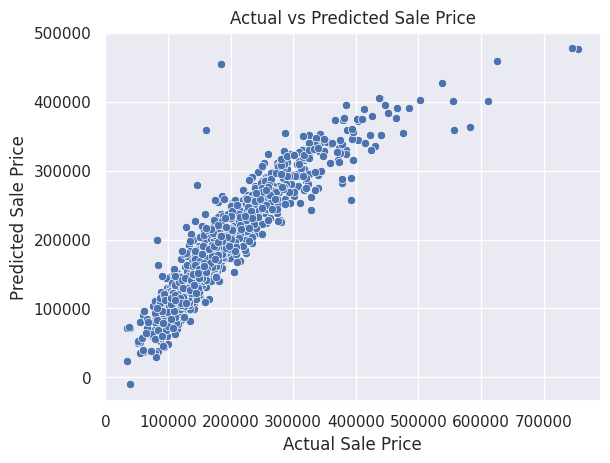

In [ ]:
# Add predictions to the training dataset
df_train['reg3_SalePrice'] = results.predict(sm.add_constant(df_train[features]))

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg3_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg3_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg3_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg3_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg3_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg3_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg3_SalePrice']].to_csv('reg3_prediction.csv', index=False)

### Standardization before regularization techniques

#### Standardize all numeric variables

In [ ]:
# Standardize numeric features in df_train and df_test datasets
scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])

#### MLR (reg4)
All numeric features, no categorical features, numerical features are standardized, includes engineered features

Kaggle Score: 0.17434

**TAKEAWAY:** Standardization doesn't change OLS model regression, but it does help interpret weights of coefficients with respect to each other.

In [ ]:
# Select the features and target variable
features = numeric_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg4 = sm.OLS(y, X)
results = reg4.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     220.8
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -17134.
No. Observations:                1460   AIC:                         3.435e+04
Df Residuals:                    1421   BIC:                         3.455e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.809e+05 

In [ ]:
# Add predictions to test dataset
df_test['reg4_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg4_SalePrice']].to_csv('reg4_prediction.csv', index=False)

#### MLR (reg5)
All numeric and categorical features, numerical features are standardized, includes engineered features

Kaggle Score: 0.18607

**TAKEAWAY:** Including all the features and engineered features overfits the model.

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Add constant term
X = sm.add_constant(X)

# Create and fit model
reg5 = sm.OLS(y, X)
results = reg5.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.50
Date:                Sun, 20 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:47:08   Log-Likelihood:                -16569.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1209   BIC:                         3.497e+04
Df Model:                         250                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.008e+

In [ ]:
# Add predictions to test dataset
df_test['reg5_SalePrice'] = results.predict(sm.add_constant(df_test[features]))

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg5_SalePrice']].to_csv('reg5_prediction.csv', index=False)

### Lasso, Ridge and Elastic Net Regression

#### Lasso (reg6)
All numeric features, standardized, includes engineered features

Kaggle Score: 0.17425 (alpha = 100)

Kaggle Score: 0.17428 (alpha = 10)

Kaggle Score: 0.17433 (alpha = 1)

Kaggle Score: 0.17434 (alpha = 0.1)


**TAKEAWAY:** Since alpha doesn't impact the prediction much, I assume the features explain the target well.

In [ ]:
# Select the features and target variable
features = numeric_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Create and fit model
reg6 = Lasso(alpha=10)
results = reg6.fit(X, y)

# Display coefficients with feature names
coef_df = pd.Series(results.coef_, index=X.columns)
sorted_coef = coef_df.round(2).sort_values(ascending=False)
print(sorted_coef)

# Display intercept
print(f"\nIntercept: {results.intercept_:.4f}")

1stFlrSF                59843.07
2ndFlrSF                59163.74
AvgSalePrice            16278.46
TotalBsmtSF             15651.55
GrLivArea               15216.46
OverallQual             15027.71
BsmtFinSF1              11023.34
OpenSpaceRatio           8705.03
OverallCond              7763.53
GarageCars               7068.41
AgeAtSale                6381.97
LowQualFinSF             4584.80
YearBuilt                4573.58
MasVnrArea               4054.92
ScreenPorch              2828.01
BsmtUnfSF                2382.32
BsmtFullBath             2248.61
WoodDeckSF               2134.56
BsmtFinSF2               1840.27
LotArea                  1809.71
PoolArea                 1653.24
AgeSinceRemod            1551.45
Fireplaces               1471.31
YearRemodAdd             1444.69
TotalLivArea              949.21
3SsnPorch                 908.13
BsmtHalfBath              369.01
YrSold                    230.00
EnclosedPorch             166.22
TotalBaths                 -0.00
MiscVal   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Correlation: 0.9247355521318082
RMSE: 30,226
MAE: 19,010
R² Score: 0.8551


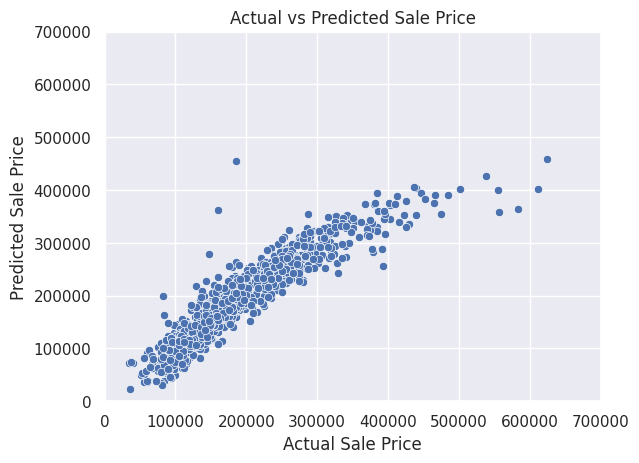

In [ ]:
# Add predictions to the training dataset
df_train['reg6_SalePrice'] = results.predict(df_train[features])

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg6_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg6_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg6_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg6_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg6_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg6_SalePrice'] = results.predict(df_test[features])

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg6_SalePrice']].to_csv('reg6_prediction.csv', index=False)

#### Lasso (reg7)
All numeric and categorical features, standardized, includes engineered features

Kaggle Score: 0.17849 (alpha = 1)

Kaggle Score: 0.16184 (alpha = 10)

Kaggle Score: 0.15335 (alpha = 100)

**TAKEAWAY:** Lasso does better when there are more variables that are correlated when compared to OLS. Lasso is able to shrink the redundant categorical variables that were previously overfitting the model and bring out the value of the other categorical variables as it this model performs better than the previous set of Lasso regressions.

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Create and fit model
reg7 = Lasso(alpha=100)
results = reg7.fit(X, y)

# Display coefficients with feature names
coef_df = pd.Series(results.coef_, index=X.columns)
sorted_coef = coef_df.round(2).sort_values(ascending=False)
print(sorted_coef)

# Display intercept
print(f"\nIntercept: {results.intercept_:.4f}")

RoofMatl_WdShngl         60943.70
GrLivArea                47297.66
TotalLivArea             21451.47
Neighborhood_NoRidge     17828.03
Exterior1st_BrkFace      16418.58
BsmtExposure_Gd          16004.53
SaleType_New             15719.95
Neighborhood_StoneBr     14626.04
AvgSalePrice             11797.55
Functional_Typ           11594.44
OverallQual              11139.76
Condition1_Norm           9672.91
TotalBsmtSF               9385.15
LandContour_HLS           9103.26
Neighborhood_BrkSide      8534.08
Neighborhood_Crawfor      7844.89
OverallCond               7171.03
LotConfig_CulDSac         6892.59
OpenSpaceRatio            6643.26
Exterior2nd_ImStucc       6530.72
LandContour_Lvl           6387.74
GarageCars                5891.99
MSSubClass_20             5375.23
MSSubClass_30             5283.02
BsmtFinSF1                5236.24
MasVnrType_None           5166.95
MasVnrArea                4345.50
BsmtFinType1_GLQ          4148.80
YearBuilt                 4143.21
SaleCondition_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.049e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Correlation: 0.9528716769340638
RMSE: 24,113
MAE: 15,244
R² Score: 0.9078


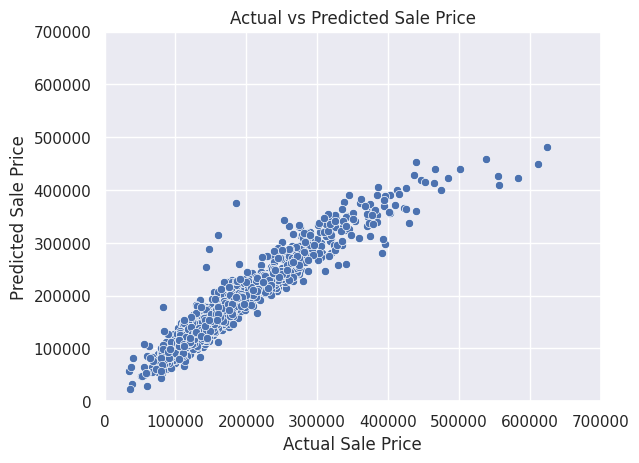

In [ ]:
# Add predictions to the training dataset
df_train['reg7_SalePrice'] = results.predict(df_train[features])

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg7_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg7_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg7_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg7_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg7_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg7_SalePrice'] = results.predict(df_test[features])

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg7_SalePrice']].to_csv('reg7_prediction.csv', index=False)

#### Ridge (reg8)
All numeric and categorical features, standardized, includes engineered features

Kaggle Score: 0.16387 (alpha = 1)

Kaggle Score: 0.15392 (alpha = 10)

Kaggle Score: 0.15216 (alpha = 100)



In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Create and fit Ridge model
reg8 = Ridge(alpha=100)
results = reg8.fit(X, y)

# Display coefficients with feature names
coef_df = pd.Series(results.coef_, index=X.columns)
sorted_coef = coef_df.round(2).sort_values(ascending=False)
print(sorted_coef)

# Display intercept
print(f"\nIntercept: {results.intercept_:.4f}")

AvgSalePrice             14361.72
OverallQual              13158.26
GrLivArea                11098.03
TotalLivArea              9816.13
BsmtExposure_Gd           8801.18
TotRmsAbvGrd              7886.30
2ndFlrSF                  7542.09
1stFlrSF                  6654.63
OverallCond               6589.98
GarageCars                6360.93
Condition1_Norm           6128.86
OpenSpaceRatio            5178.28
TotalBsmtSF               5134.99
Exterior1st_BrkFace       5122.15
Neighborhood_NoRidge      5116.24
Functional_Typ            4884.64
MSSubClass_20             4859.70
MasVnrArea                4843.14
RoofMatl_WdShngl          4802.82
SaleType_New              4444.08
LotConfig_CulDSac         4195.37
BsmtFinType1_GLQ          4145.04
BsmtFinSF1                4058.49
Neighborhood_StoneBr      3947.74
SaleCondition_Partial     3803.35
LandContour_HLS           3650.19
Fireplaces                3627.76
MasVnrType_None           3588.25
Neighborhood_BrkSide      3534.89
AvgRmSize     

Correlation: 0.9401514424786233
RMSE: 27,146
MAE: 15,961
R² Score: 0.8832


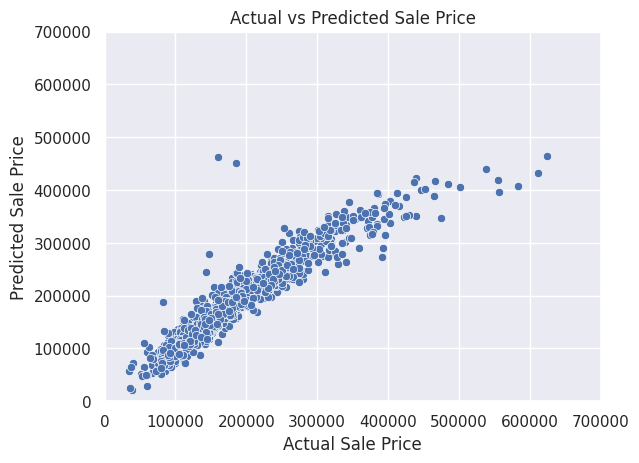

In [ ]:
# Add predictions to the training dataset
df_train['reg8_SalePrice'] = results.predict(df_train[features])

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg8_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg8_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg8_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg8_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg8_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg8_SalePrice'] = results.predict(df_test[features])

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg8_SalePrice']].to_csv('reg8_prediction.csv', index=False)

#### Elastic Net (reg9)
All numeric and categorical features, standardized, includes engineered features

Kaggle Score: 0.14758 (alpha = 1, l1_ratio = 0.5 )

**TAKEAWAY:** Elastic net uses the best features of Ridge and Lasso and provides the best prediction.

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Create and fit Elastic Net model
reg9 = ElasticNet(alpha=1.0, l1_ratio=0.5)
results = reg9.fit(X, y)

# Display coefficients with feature names
coef_df = pd.Series(results.coef_, index=X.columns)
sorted_coef = coef_df.round(2).sort_values(ascending=False)
print(sorted_coef)

# Display intercept
print(f"\nIntercept: {results.intercept_:.4f}")

AvgSalePrice             10505.82
OverallQual               9950.91
GrLivArea                 6399.87
TotalLivArea              6017.38
TotRmsAbvGrd              5766.28
1stFlrSF                  4865.15
GarageCars                4818.67
MasVnrArea                4263.79
OverallCond               4193.44
TotalBsmtSF               3630.67
GarageArea                3570.11
Fireplaces                3532.19
2ndFlrSF                  3418.20
BsmtFinSF1                3227.38
AvgRmSize                 3104.24
OpenSpaceRatio            3022.08
TotalBaths                2975.14
BsmtExposure_Gd           2738.63
WoodDeckSF                2641.98
BsmtFinType1_GLQ          2369.95
ScreenPorch               2289.99
LotArea                   2157.32
Condition1_Norm           2130.09
FullBath                  2062.36
YearRemodAdd              1931.06
RoofStyle_Hip             1796.50
SaleType_New              1795.32
SaleCondition_Partial     1725.46
Neighborhood_NridgHt      1683.32
BsmtFullBath  

Correlation: 0.9186607251389116
RMSE: 31,777
MAE: 17,701
R² Score: 0.8399


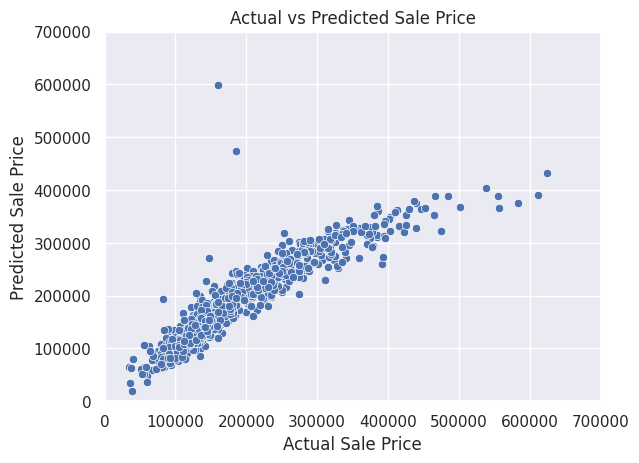

In [ ]:
# Add predictions to the training dataset
df_train['reg9_SalePrice'] = results.predict(df_train[features])

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg9_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg9_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg9_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg9_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg9_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg9_SalePrice'] = results.predict(df_test[features])

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg9_SalePrice']].to_csv('reg9_prediction.csv', index=False)

#### Elastic Net Hyperparameter Tuning
Best alpha: 0.0152

Best l1_ratio: 0.5

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Run ElasticNetCV
reg_cv = ElasticNetCV(
    l1_ratio=np.linspace(0.1, 0.9, 9),  # Try different l1_ratios
    alphas=np.logspace(-4, 2, 100),     # Try alphas from 0.0001 to 100
    cv=5,
    max_iter=10000
    )
reg_cv.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1438115637.9499512, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2235025222.4421387, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 50172353167.51111, tolerance: 759214014.2531197
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceW

Best alpha: 0.01519911082952933
Best l1_ratio: 0.5


In [ ]:
# Best parameters
print(f"Best alpha: {reg_cv.alpha_}")
print(f"Best l1_ratio: {reg_cv.l1_ratio_}")

Best alpha: 0.01519911082952933
Best l1_ratio: 0.5


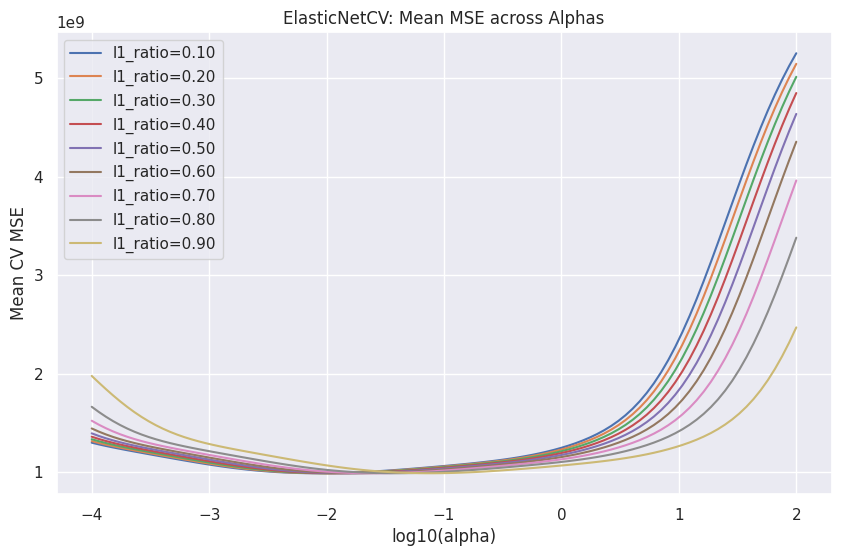

In [ ]:
# Visualizing hyperparameter tuning
mse_path = reg_cv.mse_path_  # shape (n_l1_ratios, n_alphas, n_folds)

# Average MSE across folds
mean_mse = mse_path.mean(axis=2)  # shape (n_l1_ratios, n_alphas)

# Plot for each l1_ratio
alphas = reg_cv.alphas_
l1_ratios = reg_cv.l1_ratio if isinstance(reg_cv.l1_ratio, np.ndarray) else [reg_cv.l1_ratio]

plt.figure(figsize=(10, 6))
for i, l1_ratio in enumerate(l1_ratios):
    plt.plot(np.log10(alphas), mean_mse[i], label=f"l1_ratio={l1_ratio:.2f}")

plt.xlabel('log10(alpha)')
plt.ylabel('Mean CV MSE')
plt.title('ElasticNetCV: Mean MSE across Alphas')
plt.legend()
plt.show()

#### Elastic Net (reg10)
All numeric and categorical features, standardized, includes engineered features

Kaggle Score: 0.15413 (alpha = 0.0152, l1_ratio = 0.5)

**TAKEAWAY:** Model has too many noisy variables, hyper parameter tuning doesn't improve the model.

In [ ]:
# Select the features and target variable
features = numeric_features + boolean_features
target = 'SalePrice'

# Create feature and target DataFrames for training
X = df_train[features].copy()
y = df_train[target]

# Convert boolean features to int (0 or 1)
for feature in boolean_features:
    X[feature] = X[feature].astype(int)

# Create and fit Elastic Net model
reg10 = ElasticNet(alpha=0.0152, l1_ratio=0.5)
results = reg10.fit(X, y)

# Display coefficients with feature names
coef_df = pd.Series(results.coef_, index=X.columns)
sorted_coef = coef_df.round(2).sort_values(ascending=False)
print(sorted_coef)

# Display intercept
print(f"\nIntercept: {results.intercept_:.4f}")

RoofMatl_WdShngl         26869.92
GrLivArea                22638.16
TotalLivArea             19223.40
2ndFlrSF                 17488.47
BsmtExposure_Gd          15132.28
Neighborhood_NoRidge     13550.24
AvgSalePrice             13186.74
Neighborhood_StoneBr     12925.35
Exterior1st_BrkFace      12337.51
OverallQual              11517.90
Functional_Typ           11483.34
1stFlrSF                 11029.33
Exterior2nd_ImStucc      10488.60
LandContour_HLS          10452.12
SaleType_New             10023.68
Condition1_Norm           9440.78
Street_Pave               9393.09
TotalBsmtSF               8990.25
Neighborhood_BrkSide      8672.88
Condition2_Norm           8361.73
LotConfig_CulDSac         7611.07
Neighborhood_Crawfor      7587.07
LandContour_Lvl           7173.35
MSSubClass_30             7051.50
OverallCond               6862.10
GarageCars                6531.41
BsmtFinSF1                6426.56
MasVnrType_None           5899.39
MSSubClass_20             5643.41
HouseStyle_1St

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.389e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


Correlation: 0.9532676708487194
RMSE: 24,014
MAE: 15,025
R² Score: 0.9086


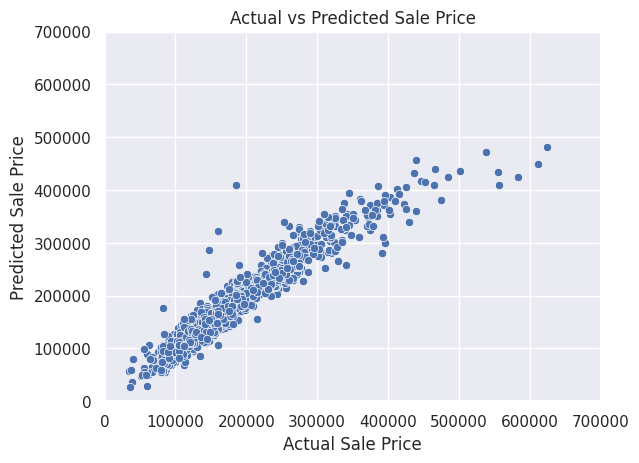

In [ ]:
# Add predictions to the training dataset
df_train['reg10_SalePrice'] = results.predict(df_train[features])

# Calculate correlation between actual and predicted SalePrice
correlation = df_train['SalePrice'].corr(df_train['reg10_SalePrice'])
rmse = np.sqrt(mean_squared_error(df_train['SalePrice'], df_train['reg10_SalePrice']))
mae = mean_absolute_error(df_train['SalePrice'], df_train['reg10_SalePrice'])
r2 = r2_score(df_train['SalePrice'], df_train['reg10_SalePrice'])

# Print the correlation
print(f"Correlation: {correlation}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAE: {mae:,.0f}")
print(f"R² Score: {r2:.4f}")

# Create a scatter plot to visualize the relationship
sns.scatterplot(x='SalePrice', y='reg10_SalePrice', data=df_train)
plt.title('Actual vs Predicted Sale Price')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.xlim(0, 700000)
plt.ylim(0, 700000)
plt.show()

In [ ]:
# Add predictions to test dataset
df_test['reg10_SalePrice'] = results.predict(df_test[features])

In [ ]:
# Exporting prediction into a csv
df_test[['Id', 'reg10_SalePrice']].to_csv('reg10_prediction.csv', index=False)